In [1]:
# import libraries
# data loading, manipulation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data split
from sklearn.model_selection import train_test_split

# label encoding
from sklearn.preprocessing import LabelEncoder

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data scalling and standardization
from sklearn.preprocessing import StandardScaler

# model evaluation
from  sklearn.metrics  import  accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
# Read data in python
df = pd.read_csv("loan_repayment_data.csv")
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [3]:
# Consise Summery / dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Statistical Summery
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Checking Missing values

In [5]:
# Checking For Null Values
df.isnull().sum()#.sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Our DataFrame contain Zero Null values.

## Checking Correlation

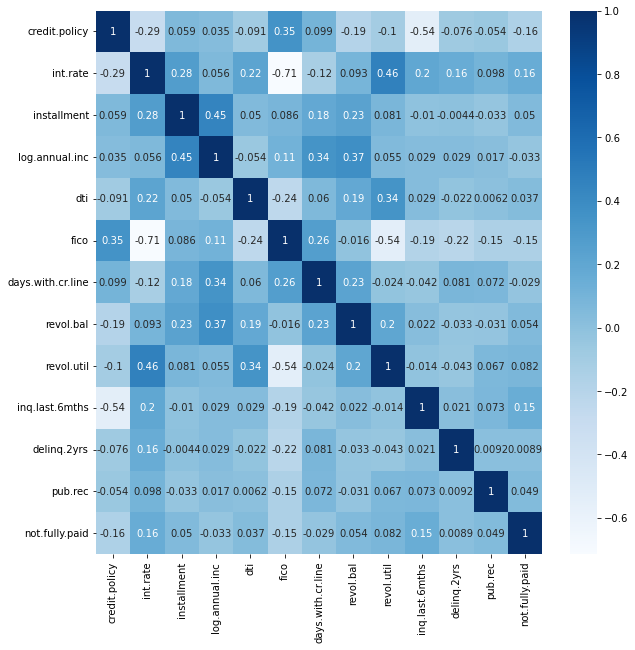

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

We can see that init rate, credit policy, fico and inq.last.6mths has corresponding grater impact on target class(not.gully.paid)



## Categorical independent variable

Now lets deal with categorical data, **Purpose** attribute/variable.

In [7]:
# unique values in purpose attribute
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

It has 6 unique values. lets convert these labels into numeric form.

Encoding
We will be using **Label Encoder** to convert labels available in purpose attribute.

It will Encode purpose labels with value between 0 and n_classes-1(5).

In [8]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


## Checking distribution of target variable

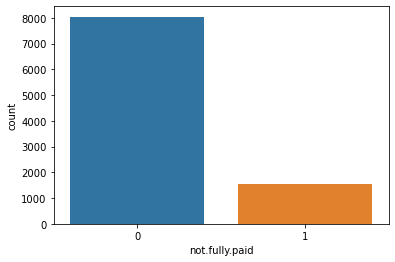

In [9]:
sns.countplot(data = df, x = 'not.fully.paid')
plt.show()

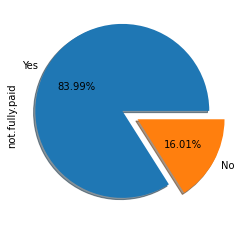

In [10]:
labels = 'Yes', 'No'
ex = [0.1, 0.1]
df['not.fully.paid'].value_counts().plot.pie(labels = labels, autopct = '%1.2f%%', shadow = True, explode = ex)
plt.show()

In [11]:
# Checking duplicates
duplicates = df[df.duplicated()]
print("Duplicates: ", len(duplicates))
duplicates

Duplicates:  0


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In our data we don't have any duplicates.

# Train Test and Validation

When you are training a Supervised Machine Learning models, it is important that you split your dataset into at least a training dataset and a testing dataset. 

#### Why split your dataset into training and testing data?
To understand the importance of Training and Testing split have a look in this video - https://youtu.be/RqDue-1co-Q
1. Feed samples to (an initialized) model: samples from your dataset are fed forward through the model, generating predictions.
2. Compare predictions and ground truth: the predictions are compared with the true labels corresponding to the samples, allowing us to identify how bad the model performs.
3. Improve: based on the optimization metric, we can change the model's internals here and there, so that it (hopefully) performs better during the next iteration.
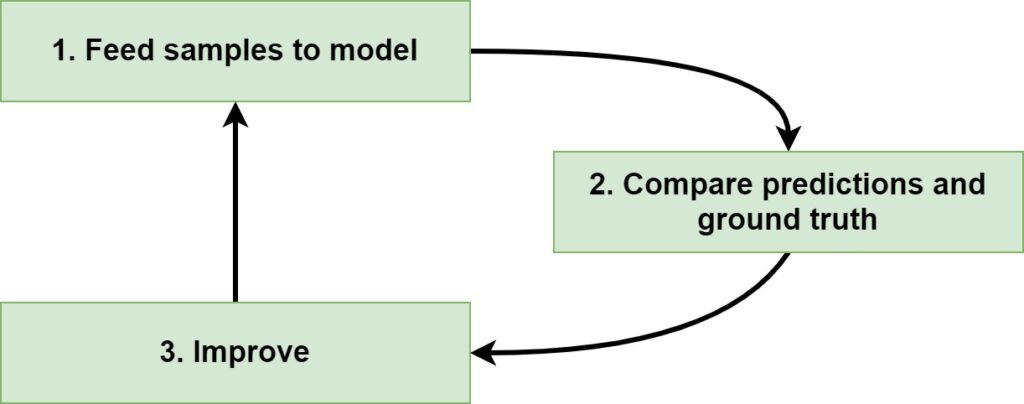


- Create a train/test split with Scikit-learn is pretty straight forward. 
- Common splits are 80% training data and 20% testing data.
- You don't want a model that performs well to your training data but performs poorly during inference.

## First split 
- Split data into train(80%) and test(20%), this is a common practice
- Use random_state = 0, because you don't want to use different sample when you're trying to improve your model by applying various methods like data manipulation or feature selection or hyper-parameter tuning.
- Use startify=y , beacuse you want to split data in such way that your data distribution for training and testing should be same. 
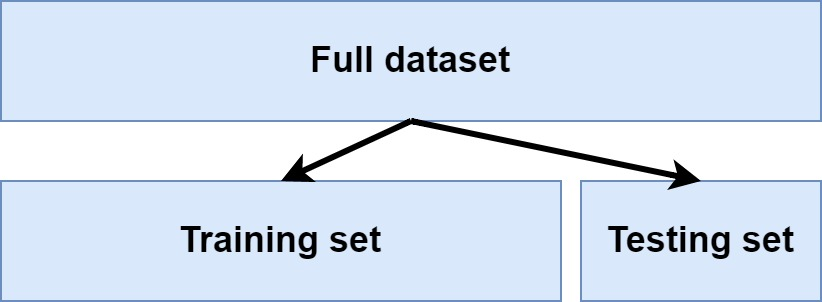

## Second Split
- If you use the training set for both feeding data forward and improving the model, you're getting yourself into trouble again. Here's why: improvement will then be a butcher who checks their own meat. Just like with the training data and testing data, optimizing using training data will mean that you will always tend to move towards capturing patterns present in the training set only. You don't want to touch the testing data until you have finished training, so you must figure out a different solution.
- This solution is simple: we'll apply another split when training a Neural network - a training/validation split. Here, we use the training data available after the split (in our case 80%) and split it again following (usually) a 80/20 split as well. 
- That means again train(80%) and validation(20%)
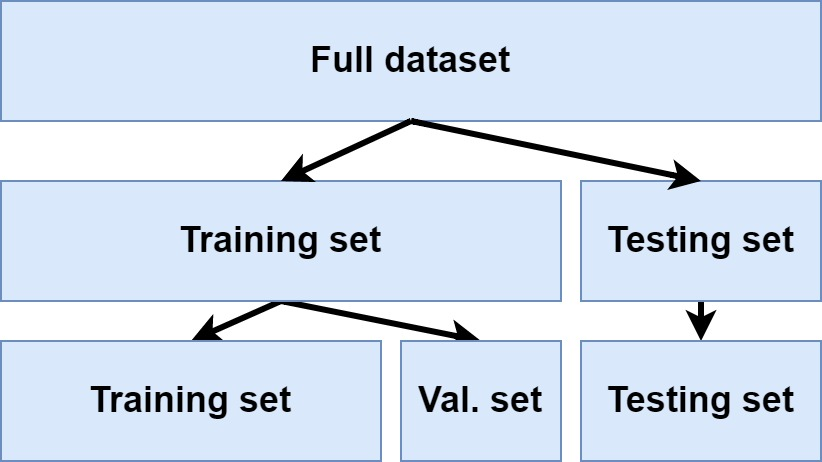

## first split 
- training(80%) and testing(20%)

In [36]:
# Dropping target class
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [37]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y , test_size=0.2,random_state=0, stratify=y)

In [38]:
print(X_train1.shape)
print(X_test.shape)
print(y_train1.shape)
print(y_test.shape)

(7662, 13)
(1916, 13)
(7662,)
(1916,)


## Second split 
- training(80%) and validation(20%)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6129, 13)
(1533, 13)
(6129,)
(1533,)


## Applying ML Algorithms

In [51]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train) # fit a model
y_pred = classifier.predict(X_val) # predictions
print("Accuracy of Random Forest model is ", metrics.accuracy_score(y_val, y_pred) * 100, "%.")

Accuracy of Random Forest model is  84.80104370515329 %.


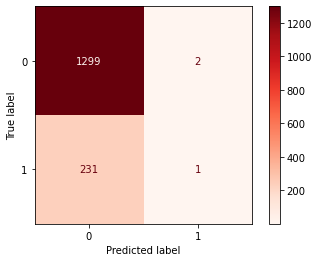

In [46]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)

# Plotting Confusion Matrix
display = ConfusionMatrixDisplay(cm)
display.plot(cmap = "Reds")
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1301
           1       0.33      0.00      0.01       232

    accuracy                           0.85      1533
   macro avg       0.59      0.50      0.46      1533
weighted avg       0.77      0.85      0.78      1533



In [48]:
# Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier

RFCmodel = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                                  min_samples_split = 10, random_state = 0, verbose = True)

RFCmodel.fit(X_train, y_train)
y_pred = RFCmodel.predict(X_val)
from sklearn import metrics
print("Accuracy of Random Forest model is ", metrics.accuracy_score(y_val, y_pred) * 100, "%.")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of Random Forest model is  84.86627527723418 %.


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


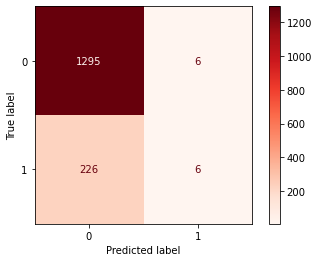

In [49]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)

# Plotting Confusion Matrix
display = ConfusionMatrixDisplay(cm)
display.plot(cmap = "Reds")
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1301
           1       0.50      0.03      0.05       232

    accuracy                           0.85      1533
   macro avg       0.68      0.51      0.48      1533
weighted avg       0.80      0.85      0.79      1533



We Found that the Best Model for this DataSet is Random Forest with Accuracy of 84.8662%.

**Thank You**

#### Note: 
This data is imbalanced so there is still scope to perform imbalancedness and improve model accuracy by performing various techniques

And additionally you can test accuracy again on your test data that we have initially splitted. 